
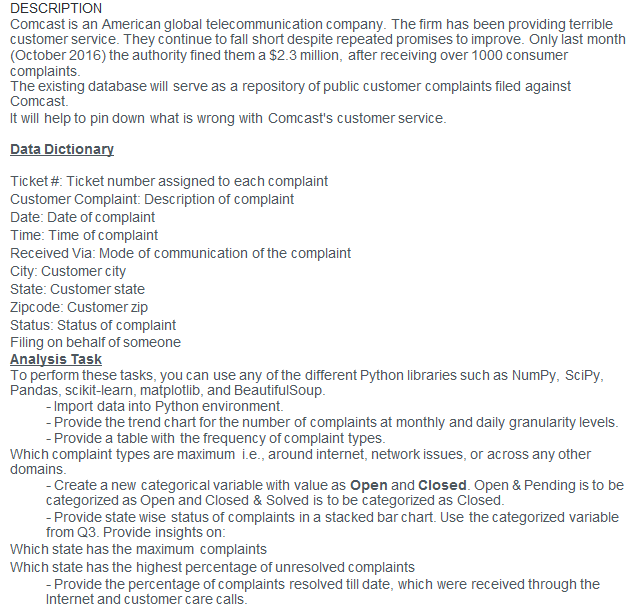

In [1]:
#Import data into Python environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df =pd.read_csv("Comcast_telecom_complaints_data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

**Provide the trend chart for the number of complaints at monthly and daily granularity levels.**

In [5]:
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])
df["Date_month_year"].value_counts().head()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
Name: Date_month_year, dtype: int64

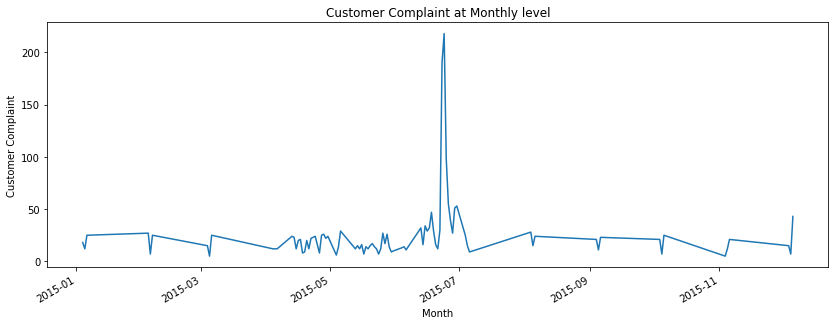

In [6]:
plt.figure(figsize=[14,5])
plt.xlabel("Month")
plt.ylabel("Customer Complaint")
plt.title("Customer Complaint at Monthly level")
df["Date_month_year"].value_counts().plot()
plt.show()

(0, 32)

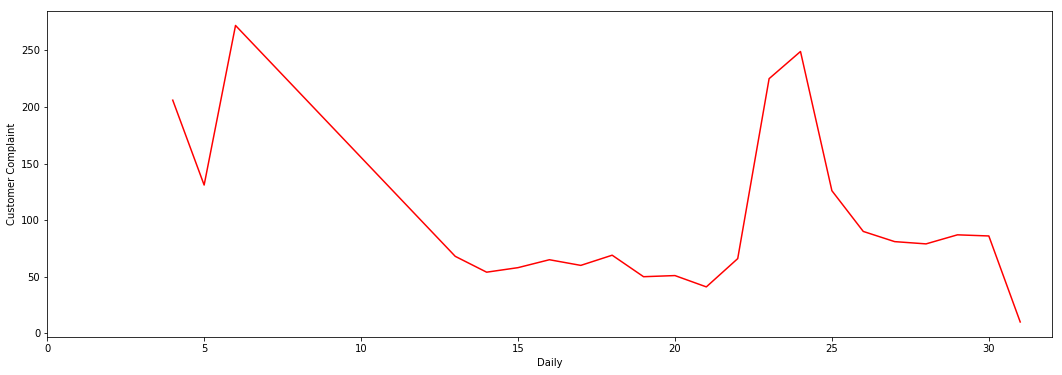

In [9]:
df['Daily'] = df['Date_month_year'].apply(lambda x: x.day)
plt.figure(figsize=(18,6))
byday = df.groupby('Daily').count().reset_index()
lp = sns.lineplot(x='Daily', y= 'Customer Complaint', data = byday, sort=False, color = 'red',markers = "o", )
ax = lp.axes
ax.set_xlim(0,32)

**Provide a table with the frequency of complaint types.**

In [10]:
df1 = df['Customer Complaint'].value_counts().rename_axis('Complain Types').reset_index(name='Frequencies')
df1

,Complain Types,Frequencies
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11
5,Comcast Billing,11
6,Comcast Data Caps,11
7,Unfair Billing Practices,9
8,Comcast internet,8
9,Comcast data caps,8


**Which complaint types are maximum i.e., around internet, network issues, or across any other domains.**

In [11]:
print("Customer Complain Type with maximum Frequency is",df1.iloc[0,0])

Customer Complain Type with maximum Frequency is Comcast


**Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.**

In [12]:
df["Upated_Status"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Day,Daily,Upated_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,22,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,4,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,5,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,26,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,2015-06-12,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,6,6,Closed
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,24,24,Open
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,23,23,Closed
8,318072,Comcast extended outages,2015-06-01,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,6,6,Closed
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,28,28,Open


Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
 Which state has the maximum complaints
 Which state has the highest percentage of unresolved complaints
 Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.



In [13]:
Statewise_complaints = df.groupby(["State","Upated_Status"]).size().unstack().fillna(0)
Statewise_complaints.sort_values(by=['Open'],ascending=False)

Upated_Status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


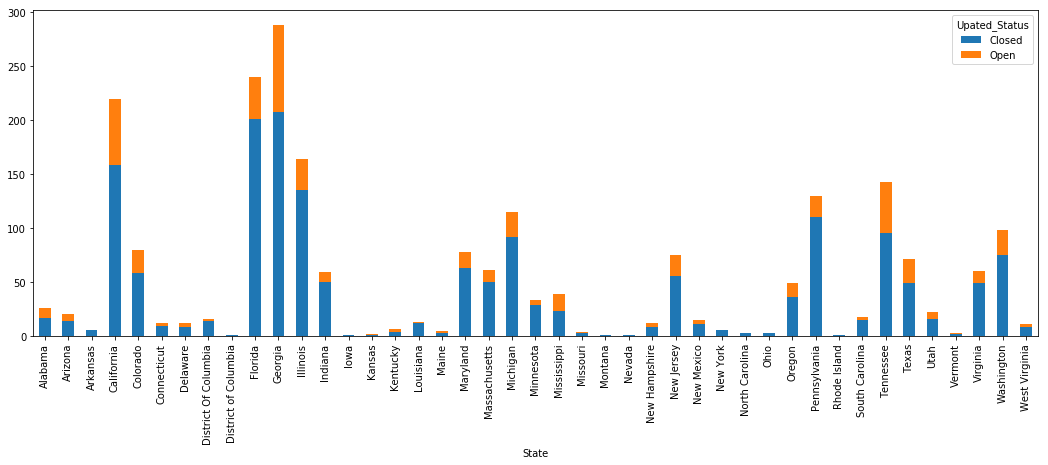

In [14]:
Statewise_complaints.plot(kind="bar", figsize=(18,6), stacked=True)
plt.show()

### Result: From above Graph we can say Georgia is has Maximum number of Customer Complaints

In [15]:
Statewise_complaints['Open'].sum()

517.0

In [16]:
Statewise_complaints['Closed'].sum()

1707.0

In [17]:
Statewise_complaints['Open'].apply(lambda x: (x/Statewise_complaints['Open'].sum())*100)

State
Alabama                  1.740812
Arizona                  1.160542
Arkansas                 0.000000
California              11.798839
Colorado                 4.255319
Connecticut              0.580271
Delaware                 0.773694
District Of Columbia     0.386847
District of Columbia     0.000000
Florida                  7.543520
Georgia                 15.473888
Illinois                 5.609284
Indiana                  1.740812
Iowa                     0.000000
Kansas                   0.193424
Kentucky                 0.580271
Louisiana                0.193424
Maine                    0.386847
Maryland                 2.901354
Massachusetts            2.127660
Michigan                 4.448743
Minnesota                0.773694
Mississippi              3.094778
Missouri                 0.193424
Montana                  0.000000
Nevada                   0.000000
New Hampshire            0.773694
New Jersey               3.675048
New Mexico               0.773694
New York

In [18]:
max(Statewise_complaints['Open'].apply(lambda x: (x/Statewise_complaints['Open'].sum())*100))

15.473887814313347

### Georgia has 15.47% of unresolved complaints which is Highest among all the states

In [19]:
df['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [20]:
Resolved_Tickets = df.groupby(['Received Via','Upated_Status']).size().unstack().fillna(0)
Resolved_Tickets


Upated_Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [23]:
Resolved_Tickets['resolved'] = Resolved_Tickets['Closed']/Resolved_Tickets['Closed'].sum()*100
Resolved_Tickets['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

-----------------------------------------------------------------------------------------------------

From above **Data Analysis** there are mainly three **Insights** can be drawn :
 #### 1.Georgia has Maximum number of Customer Complaints which is clearly visible in stacked bar chart
 ##### 2. Georgia has 15.47% of unresolved complaints which is Highest among all the states.
 #### 3. Around 50.6% of Complaints is being resolved via Customer Care Call where as 49.4% of Complaints is   being Resolved via Internet.
    

-----------------------------------------------------------------------------------------------------------------------------